<a href="https://colab.research.google.com/github/Gyperion3/-/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C%20%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Временные ряды

### Анализ временных рядов

#### Импорт данных и работа в библиотеке Pandas

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# импортируем файл с данными об акциях МТС
shares = pd.read_csv("/content/sample_data/shares.csv")
shares.head()

,Month,#Value
0,2011-01,112
1,2011-02,118
2,2011-03,132
3,2011-04,129
4,2011-05,121


In [ ]:
# превратим дату в индекс и сделаем изменение постоянным
shares.set_index('Month', inplace = True)
shares.head()

,#Value
Month,
2011-01,112
2011-02,118
2011-03,132
2011-04,129
2011-05,121


In [ ]:
# превратим дату (наш индекс) в объект datetime
shares.index = pd.to_datetime(shares.index)

# посмотрим на первые пять дат и на тип данных
shares.index[:5]

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [ ]:
# все это можно сделать в одну строчку с помощью parse_dates = True
shares = pd.read_csv("/content/sample_data/shares.csv", index_col = 'Month', parse_dates = True)
shares.head()

,#Value
Month,
2011-01-01,112
2011-02-01,118
2011-03-01,132
2011-04-01,129
2011-05-01,121


In [ ]:
# сделаем срез по дате, например, с августа 2020 по март 2021 года
shares['2020-08':'2021-03']

,#Value
Month,
2020-08-01,505
2020-09-01,404
2020-10-01,359
2020-11-01,310
2020-12-01,337
2021-01-01,360
2021-02-01,342
2021-03-01,406


#### Изменение шага временного ряда, сдвиг и скользящее среднее

In [ ]:
# изменим шаг наших данных; например, посмотрим средние данные по годам
shares.resample(rule = 'AS').mean().head()

,#Value
Month,
2011-01-01,126.666667
2012-01-01,139.666667
2013-01-01,170.166667
2014-01-01,197.000000
2015-01-01,225.000000


In [ ]:
# произведем сдвиг на два периода (в данном случае месяца) вперед
shares.shift(2, axis = 0).head()

,#Value
Month,
2011-01-01,NaN
2011-02-01,NaN
2011-03-01,112.0
2011-04-01,118.0
2011-05-01,132.0


In [ ]:
# рассчитаем скользящее среднее для трех предыдущих месяцев
shares.rolling(window = 3).mean().head()

,#Value
Month,
2011-01-01,NaN
2011-02-01,NaN
2011-03-01,120.666667
2011-04-01,126.333333
2011-05-01,127.333333


#### Построение графиков

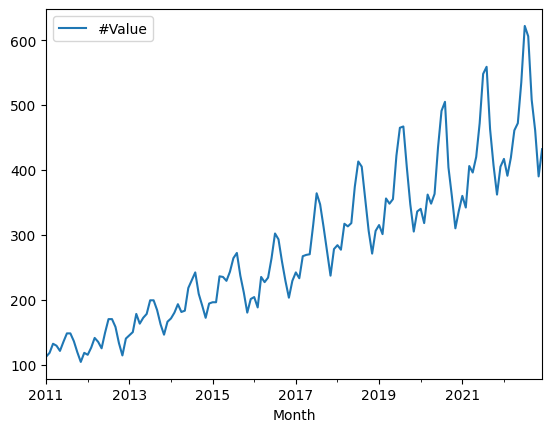

In [ ]:
# построим простой график изменения данных во времени прямо в библиотеке Pandas
shares.plot();

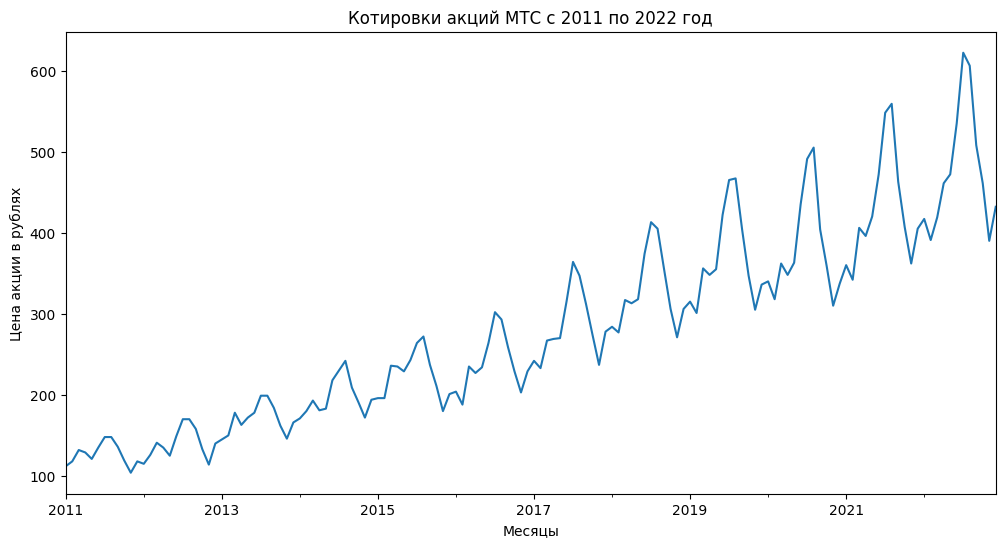

In [ ]:
# изменим размер графика, уберем легенду и добавим подписи
ax = shares.plot(figsize = (12,6), legend = None)
ax.set(title = 'Котировки акций МТС с 2011 по 2022 год', xlabel = 'Месяцы', ylabel = 'Цена акции в рублях');

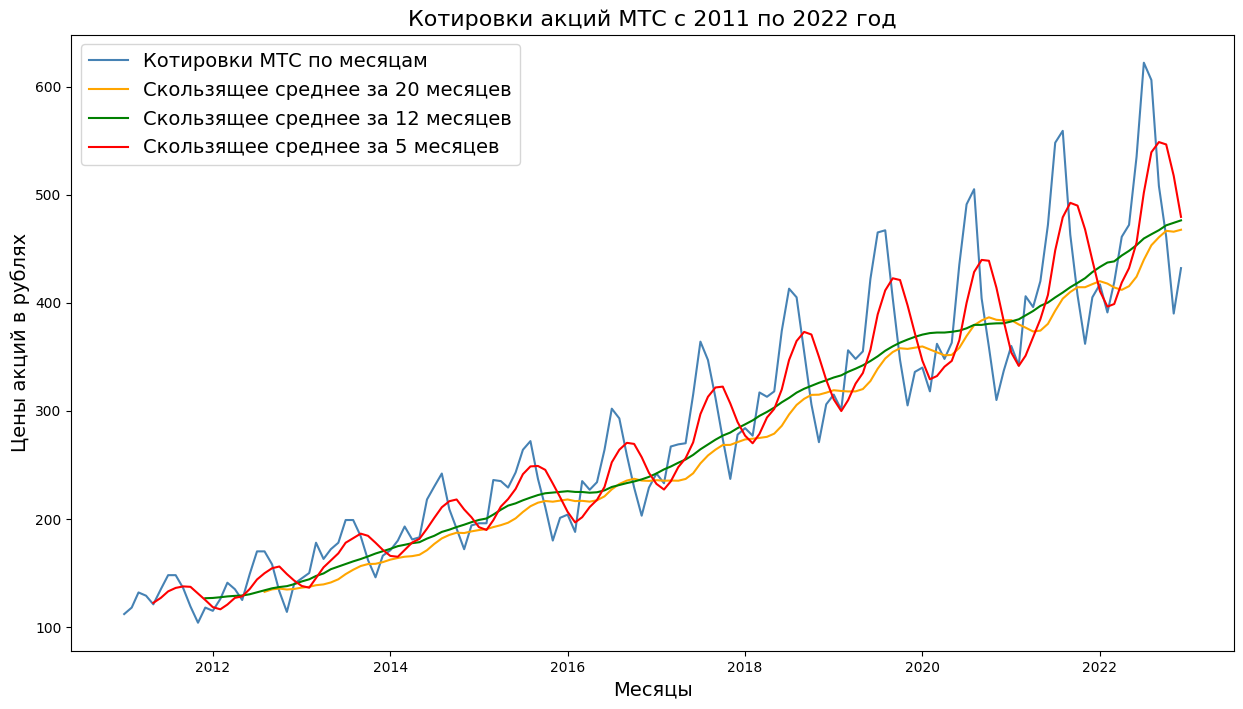

In [ ]:
# теперь воспользуемся библиотекой matplotlib для построения сразу двух графиков

# зададим размер графика
plt.figure(figsize = (15,8))

# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(shares, label = 'Котировки МТС по месяцам', color = 'steelblue')
plt.plot(shares.rolling(window = 20).mean(), label = 'Скользящее среднее за 20 месяцев', color = 'orange')
plt.plot(shares.rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'green')
plt.plot(shares.rolling(window = 5).mean(), label = 'Скользящее среднее за 5 месяцев', color = 'red')
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Цены акций в рублях', fontsize = 14)
plt.title('Котировки акций МТС с 2011 по 2022 год', fontsize = 16)

# выведем обе кривые на одном графике
plt.show()

#### Разложение временного ряда на компоненты

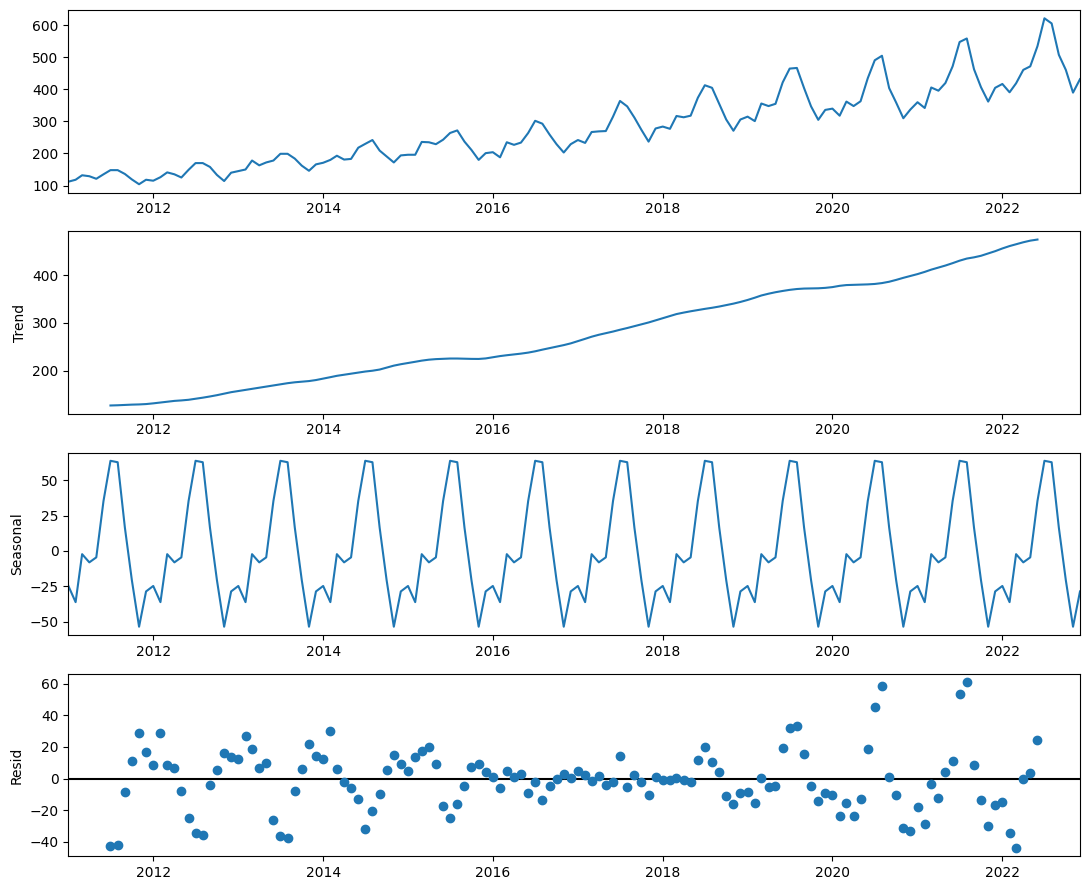

In [ ]:
# импортируем функцию seasonal_decompose из statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

# применяем функцию к данным о котировках МТС
decompose = seasonal_decompose(shares)
decompose.plot()

plt.show()

#### Проверка временного ряда на стационарность

In [ ]:
# проведем тест Дики-Фуллера (Dickey-Fuller test)

# импортируем необходимую функцию
from statsmodels.tsa.stattools import adfuller

# передадим ей столбец с данными об акциях МТС и поместим результат в adf_test
adf_test = adfuller(shares['#Value'])

# выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.991880243437641


#### Автокорреляция

In [ ]:
# для начала возьмем искусственные данные
data = np.array([16, 21, 15, 24, 18, 17, 20])

# для сдвига на одно значение достаточно взять этот ряд, начиная со второго элемента
lag_1 = data[1:]

# посчитаем корреляцию для лага 1 (у исходных данных мы убрали последний элемент)
# так как мы получим корреляционную матрицу, возьмем первую строку и второй столбец [0, 1]
np.round(np.corrcoef(data[:-1], lag_1)[0,1], 2)

-0.71

Text(0.5, 1.0, 'Автокорреляция с лагом 1')

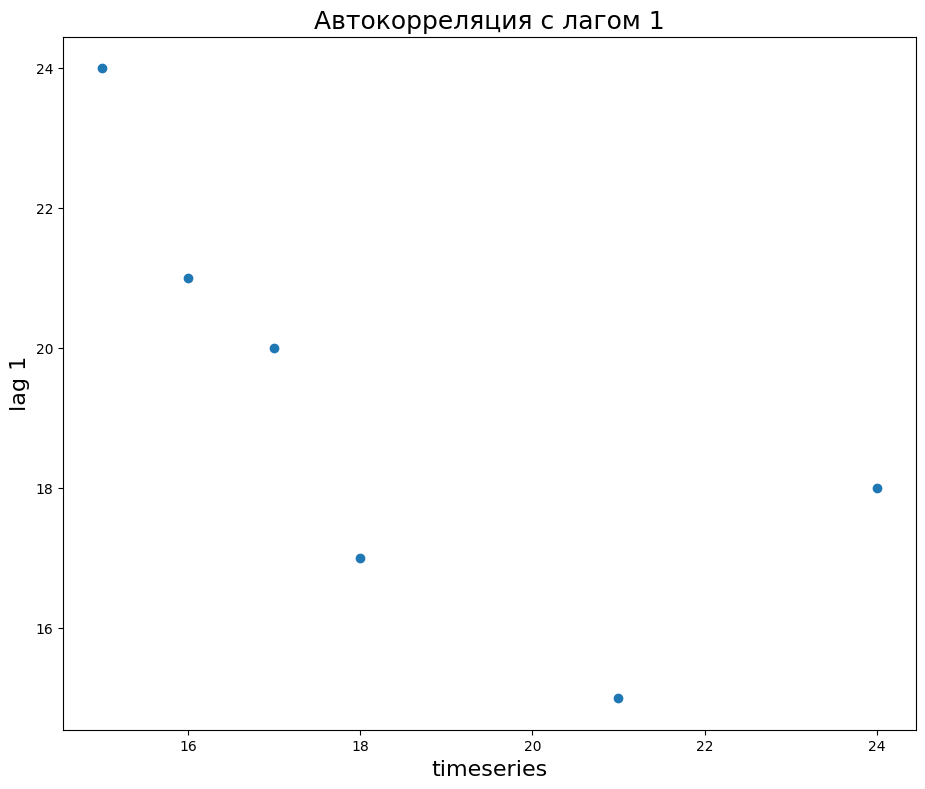

In [ ]:
# построим точечную диаграмму
plt.scatter(data[:-1], lag_1)

# добавим подписи
plt.xlabel('timeseries', fontsize = 16)
plt.ylabel('lag 1', fontsize = 16)
plt.title('Автокорреляция с лагом 1', fontsize = 18)

In [ ]:
lag = data[1:]

# посчитаем корреляцию для лага 1 (у исходных данных мы убрали последний элемент)
# так как мы получим коррелационную матрицу, возьмем первую строку и второй столбец [0, 1]
np.round(np.corrcoef(data[:-1], lag_1)[0,1], 2)

-0.71

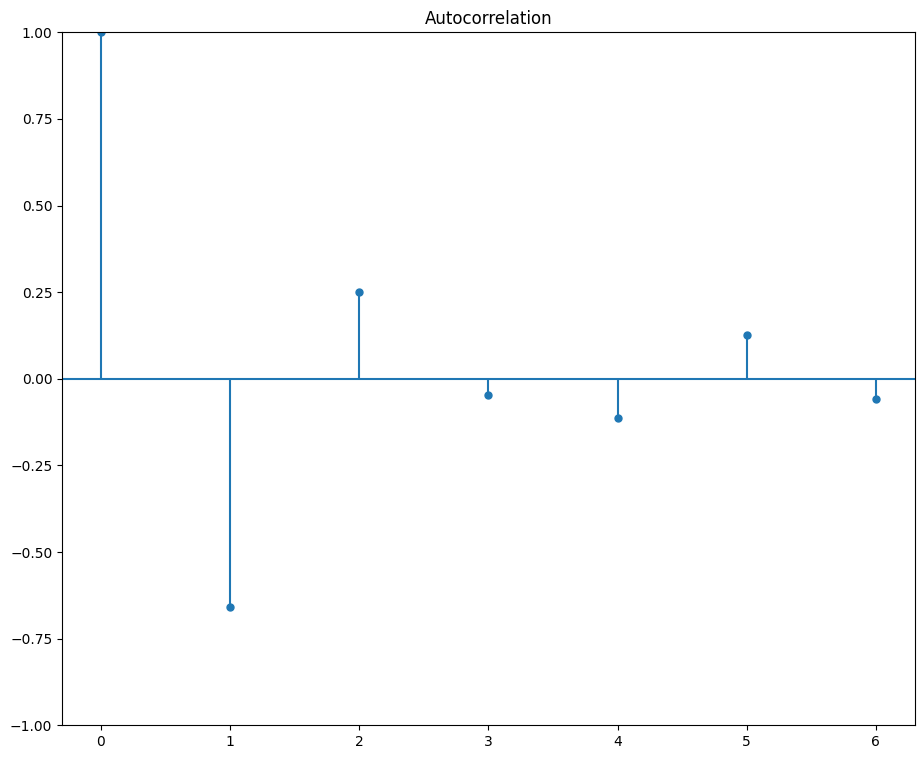

In [ ]:
# импортируем автокорреляционную функцию (ACF)
from statsmodels.graphics.tsaplots import plot_acf

# применим функцию к нашему набору данных
plot_acf(data, alpha = None)
plt.show()

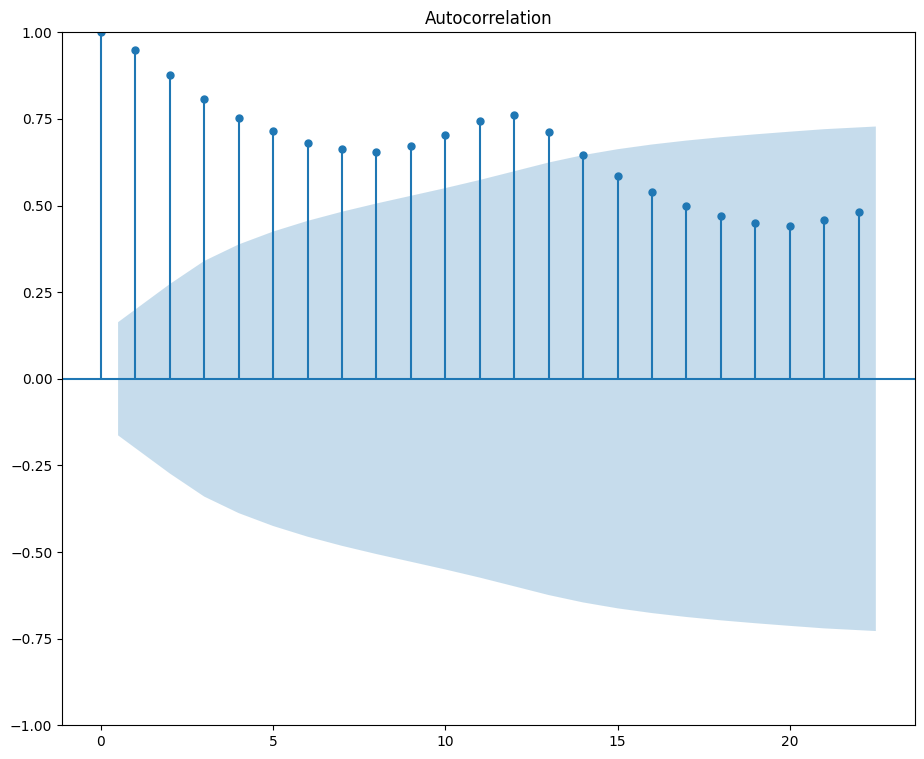

In [ ]:
# применим ее к данным о MTC
plot_acf(shares)
plt.show()

### Моделирование и построение прогноза



#### Модель SARIMAX прогноза на 2 года

In [ ]:
# разобьём данные на обучающую и тестовую выборки

# обучающая выборка будет включать данные до декабря 2020 года включительно
train = shares[:'2020-12']

# тестовая выборка начнется с января 2021 года (по сути, два года)
test = shares['2021-01':]

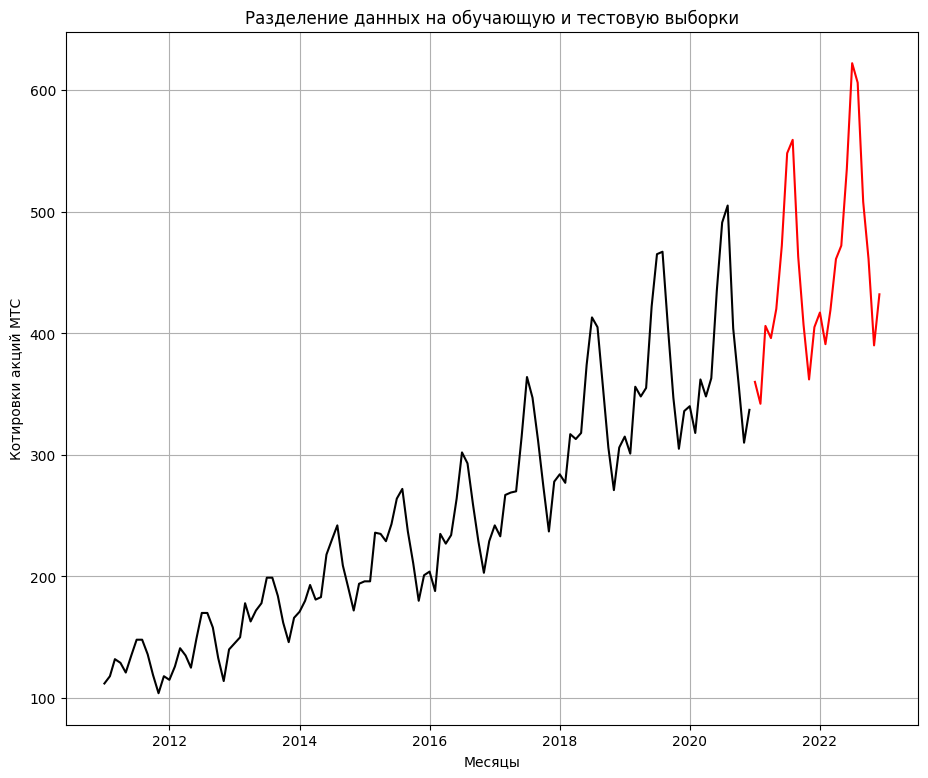

In [ ]:
# выведем эти данные на графике
plt.plot(train, color = "black")
plt.plot(test, color = "red")

# заголовок и подписи к осям
plt.title('Разделение данных на обучающую и тестовую выборки')
plt.ylabel('Котировки акций МТС')
plt.xlabel('Месяцы')

# добавим сетку
plt.grid()

plt.show()

In [ ]:
# принудительно отключим предупреждения системы
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

# обучим модель с соответствующими параметрами, SARIMAX(1, 1, 0)x(1, 1, 1, 24)

# импортируем класс модели
from statsmodels.tsa.statespace.sarimax import SARIMAX

# создадим объект этой модели
model = SARIMAX(train,
                order = (1, 1, 0),
                seasonal_order = (1, 1, 1, 24))

# применим метод fit
result = model.fit()

In [ ]:
# мы можем посмотреть результат с помощью метода summary() Чем ближе значение P>|z| к нулю, тем выше значимость
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               #Value   No. Observations:                  120
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 24)   Log Likelihood                -380.759
Date:                              Thu, 22 Jun 2023   AIC                            769.518
Time:                                      19:23:44   BIC                            779.733
Sample:                                  01-01-2011   HQIC                           773.646
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2622      0.083     -3.161      0.002      -0.425      -0.100
ar.S.L24       0.99

In [ ]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)

# и закончится в конце тестового
end = len(train) + len(test) - 1

# применим метод predict
predictions = result.predict(start, end)
predictions

2021-01-01    349.088544
2021-02-01    331.555360
2021-03-01    392.644886
2021-04-01    383.874642
2021-05-01    393.050517
2021-06-01    467.725573
2021-07-01    515.050852
2021-08-01    517.348464
2021-09-01    446.971836
2021-10-01    384.184312
2021-11-01    338.287338
2021-12-01    371.731743
2022-01-01    376.735589
2022-02-01    349.971410
2022-03-01    398.149246
2022-04-01    382.989462
2022-05-01    401.595542
2022-06-01    480.536734
2022-07-01    541.601365
2022-08-01    557.640045
2022-09-01    443.761710
2022-10-01    395.874975
2022-11-01    342.527772
2022-12-01    369.688854
Freq: MS, Name: predicted_mean, dtype: float64

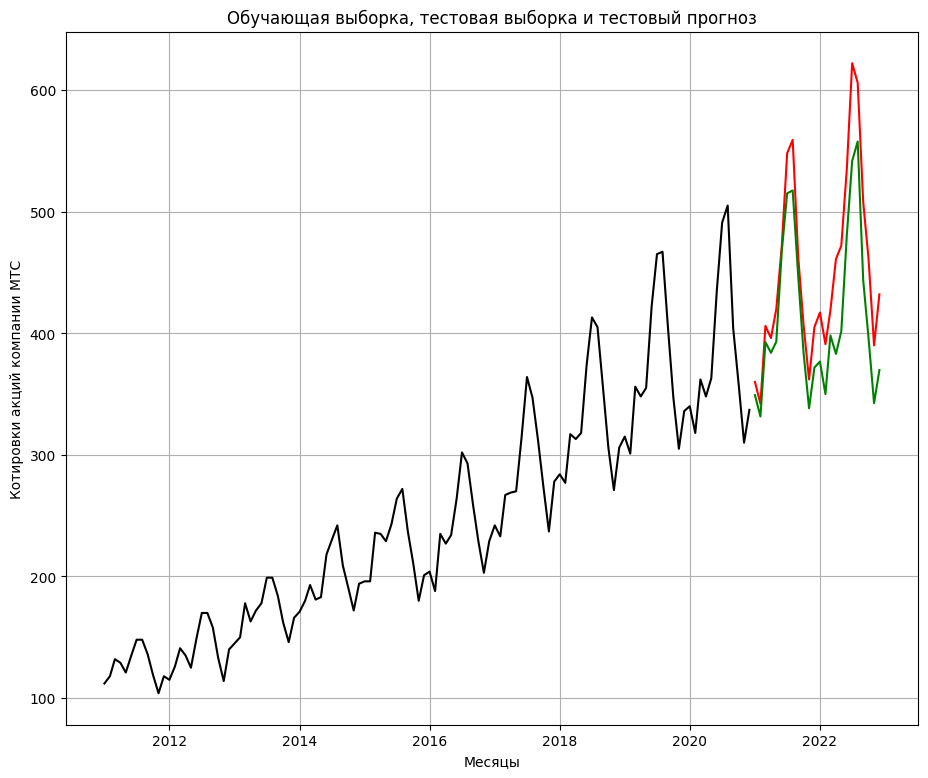

In [ ]:
# выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.plot(predictions, color = 'green')

# заголовок и подписи к осям
plt.title('Обучающая выборка, тестовая выборка и тестовый прогноз')
plt.ylabel('Котировки акций компании МТС')
plt.xlabel('Месяцы')

# добавим сетку
plt.grid()

plt.show()

## **Метрики 2 года**

In [ ]:
# импортируем метрику
from sklearn.metrics import mean_squared_error

# рассчитаем MSE
print(mean_squared_error(test, predictions))

# и RMSE
print(np.sqrt(mean_squared_error(test, predictions)))

1984.1602332549658
44.54391353770979


In [ ]:
shares.mean()

#Value    280.298611
dtype: float64

In [ ]:
# прогнозный период начнется с конца имеющихся данных
start = len(shares)

# и закончится 36 месяцев спустя
end = (len(shares) - 1) + 3 * 12

# теперь построим прогноз на три года вперед
forecast = result.predict(start, end)

# посмотрим на весь 2023 год
forecast[-12:]

2025-01-01    416.352941
2025-02-01    392.889282
2025-03-01    465.835962
2025-04-01    455.605770
2025-05-01    469.103070
2025-06-01    559.097723
2025-07-01    615.051996
2025-08-01    617.943806
2025-09-01    532.848240
2025-10-01    458.512693
2025-11-01    404.839943
2025-12-01    443.161757
Freq: MS, Name: predicted_mean, dtype: float64

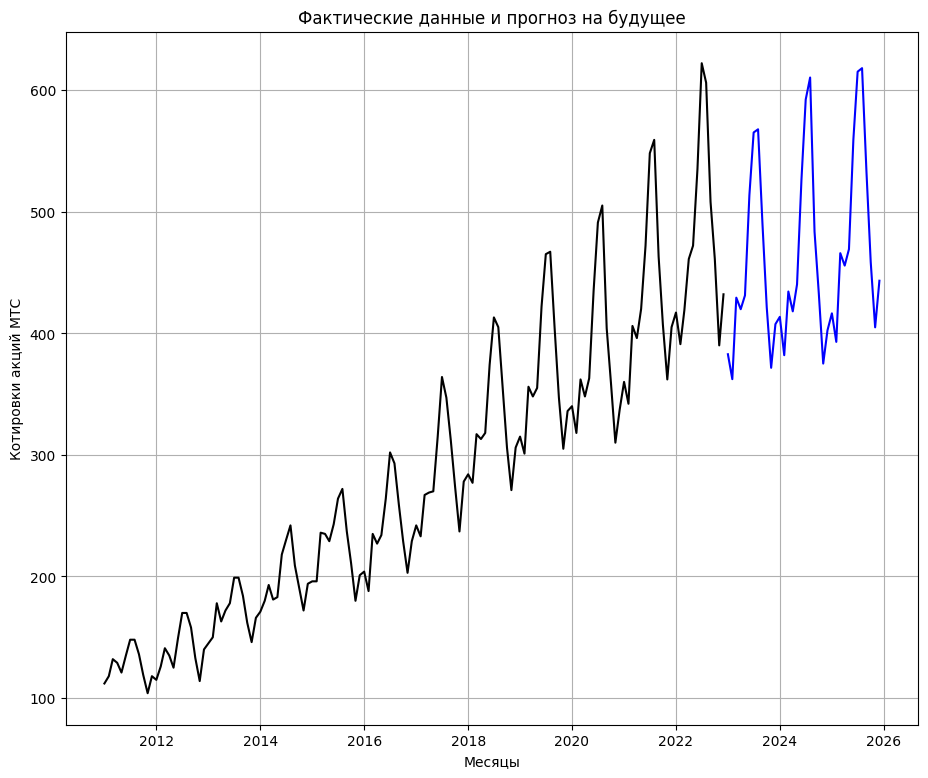

In [ ]:
# выведем две кривые (фактические данные и прогноз на будущее)
plt.plot(shares, color = 'black')
plt.plot(forecast, color = 'blue')

# заголовок и подписи к осям
plt.title('Фактические данные и прогноз на будущее')
plt.ylabel('Котировки акций МТС')
plt.xlabel('Месяцы')

# добавим сетку
plt.grid()

plt.show()

In [ ]:
Модель на 1 год

In [ ]:
# разобьём данные на обучающую и тестовую выборки

# обучающая выборка будет включать данные до декабря 2021 года включительно
train = shares[:'2021-12']

# тестовая выборка начнется с января 2022 года (по сути, один год)
test = shares['2022-01':]

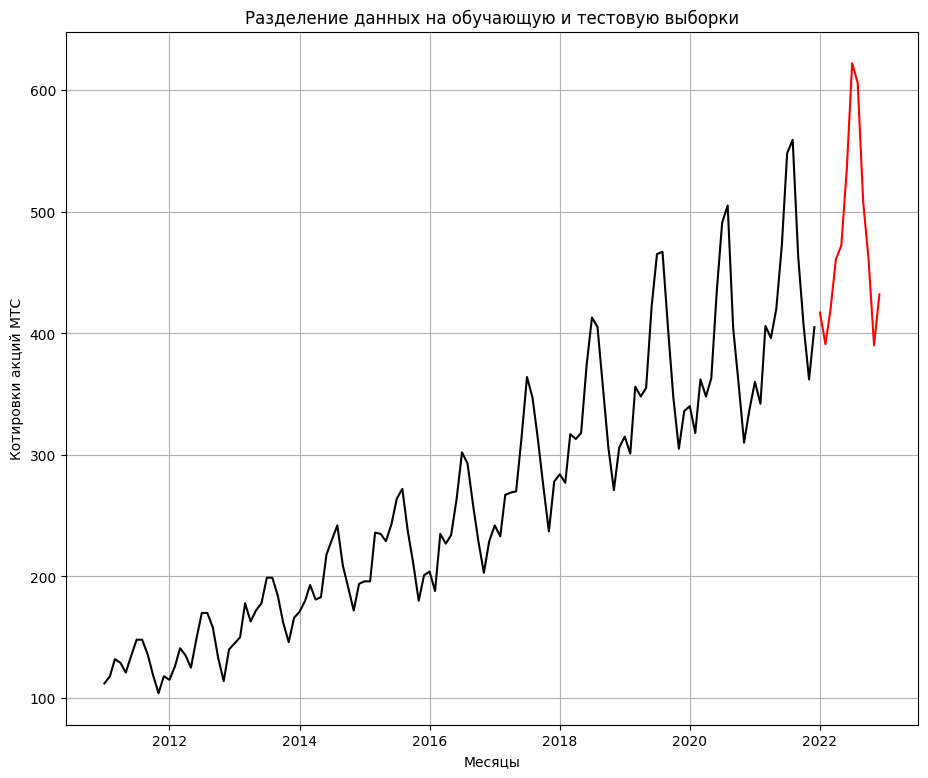

In [ ]:
# выведем эти данные на графике
plt.plot(train, color = "black")
plt.plot(test, color = "red")

# заголовок и подписи к осям
plt.title('Разделение данных на обучающую и тестовую выборки')
plt.ylabel('Котировки акций МТС')
plt.xlabel('Месяцы')

# добавим сетку
plt.grid()

plt.show()

In [ ]:
# принудительно отключим предупреждения системы
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

# обучим модель с соответствующими параметрами, SARIMAX(1, 1, 0)x(1, 1, 1, 12)

# импортируем класс модели
from statsmodels.tsa.statespace.sarimax import SARIMAX

# создадим объект этой модели
model = SARIMAX(train,
                order = (3, 0, 0),
                seasonal_order = (0, 1, 0, 12))

# применим метод fit
result = model.fit()

In [ ]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)

# и закончится в конце тестового
end = len(train) + len(test) - 1

# применим метод predict
predictions = result.predict(start, end)
predictions

2022-01-01    422.703385
2022-02-01    404.947178
2022-03-01    466.293258
2022-04-01    454.781296
2022-05-01    476.848628
2022-06-01    527.162826
2022-07-01    601.449809
2022-08-01    610.821691
2022-09-01    513.229987
2022-10-01    455.692619
2022-11-01    409.200047
2022-12-01    450.754161
Freq: MS, Name: predicted_mean, dtype: float64

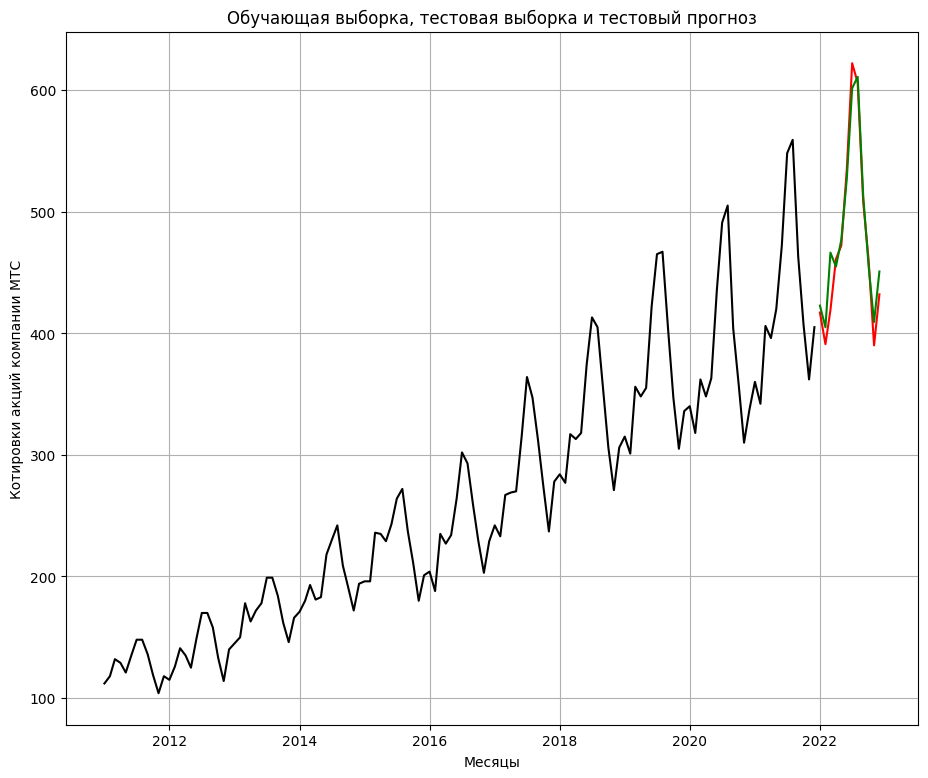

In [ ]:
# выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.plot(predictions, color = 'green')

# заголовок и подписи к осям
plt.title('Обучающая выборка, тестовая выборка и тестовый прогноз')
plt.ylabel('Котировки акций компании МТС')
plt.xlabel('Месяцы')

# добавим сетку
plt.grid()

plt.show()

## **Метрики 1 год**

In [ ]:
# импортируем метрику
from sklearn.metrics import mean_squared_error

# рассчитаем MSE
print(mean_squared_error(test, predictions))

# и RMSE
print(np.sqrt(mean_squared_error(test, predictions)))

317.39565432961956
17.81560143047715


### Дополнительный материал

In [ ]:
# установим pmdarima
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.1 MB/s eta 0:00:00


In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# импортируем функцию для автоматического подбора параметров модели ARIMA
from pmdarima import auto_arima


# "погасим" предупреждения
import warnings
warnings.filterwarnings("ignore")

# настроим поиск параметров на обучающей выборке
parameter_search = auto_arima(train, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 24, start_P = 0, seasonal = True,
                         d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,  stepwise = True)           #

# выведем результат
print(parameter_search.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[24]             : AIC=774.780, Time=1.68 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=772.210, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[24]             : AIC=773.001, Time=0.85 sec
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=773.706, Time=1.89 sec
 ARIMA(0,1,0)(1,1,0)[24]             : AIC=774.210, Time=0.80 sec
 ARIMA(0,1,0)(0,1,1)[24]             : AIC=774.210, Time=0.83 sec
 ARIMA(0,1,0)(1,1,1)[24]             : AIC=inf, Time=2.88 sec
 ARIMA(1,1,0)(0,1,0)[24]             : AIC=771.931, Time=0.08 sec
 ARIMA(1,1,0)(0,1,1)[24]             : AIC=773.315, Time=1.00 sec
 ARIMA(1,1,0)(1,1,1)[24]             : AIC=inf, Time=4.70 sec
 ARIMA(2,1,0)(0,1,0)[24]             : AIC=773.446, Time=0.27 sec
 ARIMA(1,1,1)(0,1,0)[24]             : AIC=773.390, Time=0.33 sec
 ARIMA(0,1,1)(0,1,0)[24]             : AIC=772.182, Time=0.36 sec
 ARIMA(2,1,1)(0,1,0)[24]             : AIC=775.280, Time=0.85 sec
 ARIMA(1,1,0)(0,1,0)[24] intercept   : AI